In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
import random
from sklearn import metrics
from imblearn.over_sampling import SMOTE
import os
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, defaultdict
C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [2]:
train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [3]:
#looking at the range it seems there are many outliers here
train.isna().sum().sort_values(ascending=False)

TARGET                       0
num_op_var41_ult1            0
num_var26                    0
num_var25_0                  0
num_var25                    0
                            ..
imp_trasp_var33_out_hace3    0
imp_trasp_var33_out_ult1     0
imp_venta_var44_hace3        0
imp_venta_var44_ult1         0
ID                           0
Length: 371, dtype: int64

In [4]:
#to check our estimation about outliers are correct
train['imp_ent_var16_ult1'].value_counts()

0.00        72301
300.00        221
150.00        217
600.00        172
900.00        164
            ...  
17595.15        1
84.00           1
168.75          1
139.68          1
540.66          1
Name: imp_ent_var16_ult1, Length: 596, dtype: int64

In [5]:
# there is only 1 value of 17595.15 which definitely serve as an outlier. To clean this dataset outlier ommission is needed.
# Checking outliers at 25%,50%,75%,90%,95% and 99%
train.describe(percentiles=[.25,.5,.75,.90,.95, .975,.99,.999])

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
90%,136592.100000,2.000000,52.000000,0.000000,81.153000,176.823000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.825859e+05,0.000000
95%,144222.100000,2.000000,60.000000,0.000000,436.411500,722.515500,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.427802e+05,0.000000
97.5%,148055.050000,2.000000,68.000000,450.000000,890.996250,1407.141000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.231734e+05,1.000000


In [6]:
high = .99
first_quartile = 0.25
third_quartile = 0.75
quant_df = train.quantile([high, first_quartile, third_quartile])
quant_df

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0.99,150264.81,11.0,77.0,1500.0,1633.5909,2529.4893,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,457674.1410,1.0
0.25,38104.75,2.0,23.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67870.6125,0.0
0.75,113748.75,2.0,40.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118756.2525,0.0


In [7]:
#we have our quartile dataframe now prepare clean train data
train_df = train.drop(['ID', 'TARGET'], axis = 1)
train_df = train_df.apply(lambda x: x[(x <= quant_df.loc[high,x.name])], axis=0)#threshold for 99%
train_df.describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
count,75283.000000,75267.000000,75269.000000,75259.000000,75259.000000,75725.0,75672.0,75982.0,75975.0,75791.0,...,76017.0,75977.0,75996.0,75972.0,75972.0,75921.0,75988.0,75879.0,75879.0,75259.000000
mean,-1538.803648,32.695737,18.024011,46.321598,77.921507,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108712.390269
std,39223.742286,11.927320,122.396103,182.012775,291.520526,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60804.909252
min,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5163.750000
25%,2.000000,23.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67549.500000
50%,2.000000,27.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105386.160000
75%,2.000000,39.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
max,11.000000,77.000000,1500.000000,1632.060000,2528.250000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,457252.050000


In [8]:
train_df.shape

(76020, 369)

In [9]:
train_df.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,2.0,37.0,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [10]:
train_df = pd.concat([train.loc[:,'ID'], train_df], axis=1)#concat Target and Id.Data is free of outliers

train_df = pd.concat([train.loc[:,'TARGET'], train_df], axis=1)
train_df.describe()

,TARGET,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
count,76020.000000,76020.000000,75283.000000,75267.000000,75269.000000,75259.000000,75259.000000,75725.0,75672.0,75982.0,...,76017.0,75977.0,75996.0,75972.0,75972.0,75921.0,75988.0,75879.0,75879.0,75259.000000
mean,0.039569,75964.050723,-1538.803648,32.695737,18.024011,46.321598,77.921507,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108712.390269
std,0.194945,43781.947379,39223.742286,11.927320,122.396103,182.012775,291.520526,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60804.909252
min,0.000000,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5163.750000
25%,0.000000,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67549.500000
50%,0.000000,76043.000000,2.000000,27.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105386.160000
75%,0.000000,113748.750000,2.000000,39.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
max,1.000000,151838.000000,11.000000,77.000000,1500.000000,1632.060000,2528.250000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,457252.050000


In [11]:
train_df.isnull().sum().sort_values(ascending=False) #to count null values in our dataframe we are arranging it in descending order 

var38                      761
saldo_medio_var5_hace2     761
saldo_medio_var12_ult1     761
saldo_medio_var12_hace3    761
saldo_medio_var12_hace2    761
                          ... 
ind_var26_cte                0
ind_var26                    0
ind_var25_0                  0
ind_var25                    0
TARGET                       0
Length: 371, dtype: int64

In [12]:
new_train_df = train_df
for col in new_train_df.columns:
    min_val = min(new_train_df[col])
    max_val = max(new_train_df[col])
    new_train_df[col].fillna(round(random.uniform(min_val, max_val), 2), inplace =True)


In [13]:
new_train_df.isna().sum().sort_values(ascending=False)
new_train_df

,TARGET,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,0,1,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,0,3,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,0,4,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,0,8,2.0,37.0,0.0,195.0,195.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,0,10,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,0,151829,2.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000
76016,0,151830,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000
76017,0,151835,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000
76018,0,151836,2.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000


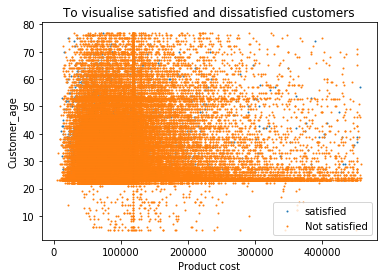

In [14]:


    # b = target values, last column of the data frame
b= new_train_df.iloc[:, 0]

    # filter out the applicants that got admitted
satisfied = new_train_df.loc[b == 1]

    # filter out the applicants that din't get admission
not_satisfied = new_train_df.loc[b == 0]

    # plots
plt.scatter(satisfied.iloc[:,370], satisfied.iloc[:,3],s=1,label='satisfied')
plt.scatter(not_satisfied.iloc[:,370], not_satisfied.iloc[:, 3],s=1,label='Not satisfied')
plt.xlabel('Product cost')
plt.ylabel('Customer_age')
plt.title('To visualise satisfied and dissatisfied customers')
plt.legend()
plt.show()

In [26]:
#data is free of null values
y = new_train_df['TARGET']
X = new_train_df.drop(['TARGET','ID'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
print("Accuracy with Logistic = ", metrics.accuracy_score(y_test, y_preds))

Accuracy with Logistic =  0.9613259668508287


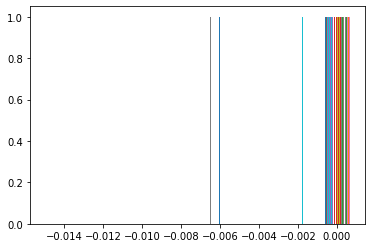

In [31]:
plt.hist(lr.coef_) 
plt.show()

In [28]:
new_train_df['TARGET'].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [33]:
#almost 95% of the data is 0 might be the reason of high accuracy
sm = SMOTE(kind = "regular")#to balance the data
X_tr,y_tr = sm.fit_sample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)

(116790, 369)
(116790,)


In [34]:
lr.fit(X_tr,y_tr)

lr_preds = lr.predict(X_test)
print("Accuracy with Logistic = ", metrics.accuracy_score(y_test, y_preds))

Accuracy with Logistic =  0.9613259668508287


In [35]:
dt1 = DecisionTreeClassifier(max_depth=5)
dt1.fit(X_tr, y_tr)

dt_preds = dt1.predict(X_test)
print("Accuracy with Decision Tree = ", metrics.accuracy_score(y_test, y_preds))

Accuracy with Decision Tree =  0.9613259668508287


In [36]:
rft = RandomForestClassifier(n_jobs=-1)
rft.fit(X_tr, y_tr)

rft_preds = rft.predict(X_test)
print("Accuracy with Random Forest = ", metrics.accuracy_score(y_test, y_preds))

Accuracy with Random Forest =  0.9613259668508287


In [50]:
x_test_final = test.drop(['ID'], axis=1)
final_prediction = dt1.predict(x_test_final)
print(final_prediction)
b=(final_prediction.shape[0])
print(b)
a=np.count_nonzero(final_prediction)
print(a)


[1 1 0 ... 0 0 0]
75818
15360


In [42]:
print("no of satisfied customers are predicted to be",a)

no of satisfied customers are predicted to be 15360


In [51]:

print("no of customers that are not satisfied",(b-a))

no of customers that are not satisfied 60458
